<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/Code_Craft_reflect_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem:
Invert and or reflect a binary tree.

For example, given the following tree:
```
      a
   /      \
  b         c
 /  \      /
d    e  f
```
should become:
```
       a
     /   \
   c       b
    \      / \
      f   e    d
```

##Solution:
First let's carefully compare and contrast the processes of inverting and reflecting a binary tree. These two operations, while similar in that they involve swapping nodes, have distinct differences in their application and resulting tree structures.

### Inverting a Binary Tree
1. **Definition**: Inverting a binary tree involves swapping the left and right child of every node in the tree. This operation is performed recursively for each node in the tree.
2. **Process**:
   - At each node, the left child becomes the right child and vice versa.
   - This swap is performed at all levels of the tree, from the root down to the leaf nodes.
3. **Result**:
   - The shape of the tree is preserved, but the positions of the left and right children are swapped at every node.
   - If the tree was originally a binary search tree, the resulting tree will not maintain the binary search tree property.
4. **Use Cases**:
   - Commonly used in problems that require a mirror image of the tree structure.
   - Used in certain tree algorithms where the specific left-right orientation is not critical.

### Reflecting a Binary Tree
1. **Definition**: Reflecting a binary tree is similar to taking a mirror image of the tree along a vertical axis. It's more of a visual transformation than a structural one.
2. **Process**:
   - Only the subtrees are swapped, not individual nodes. In other words, you swap the entire left subtree with the entire right subtree at the root.
   - This operation is not necessarily recursive. It's often done only at the root level.
3. **Result**:
   - The tree appears as if it has been mirrored along its central vertical axis.
   - Unlike inverting, reflecting a binary search tree does not necessarily disrupt its property as a search tree.
4. **Use Cases**:
   - Often used in visual representations or in graphical interfaces where a mirrored view of the tree is desired.
   - Less common in algorithmic applications compared to inversion.

### Key Differences
- **Scope of Operation**: Inversion is a recursive operation affecting every node, while reflection can be a single operation at the root (or a chosen node), affecting only the subtrees.
- **Structural Change**: Inversion can significantly alter the structure of the tree, especially for binary search trees. Reflection, especially when done only at the root, keeps the larger structure intact.
- **Visual Appearance**: Post-inversion, the tree looks like a mirrored version at every level, whereas reflection gives a mirrored appearance of the tree as a whole.

In summary, while both operations involve swapping nodes or subtrees, inverting a binary tree is a more comprehensive and structural change, affecting the properties of the tree at every level. Reflecting a binary tree, especially when done at the root level, is more of a visual rearrangement, maintaining the overall structure and properties of the tree.

Original Tree:


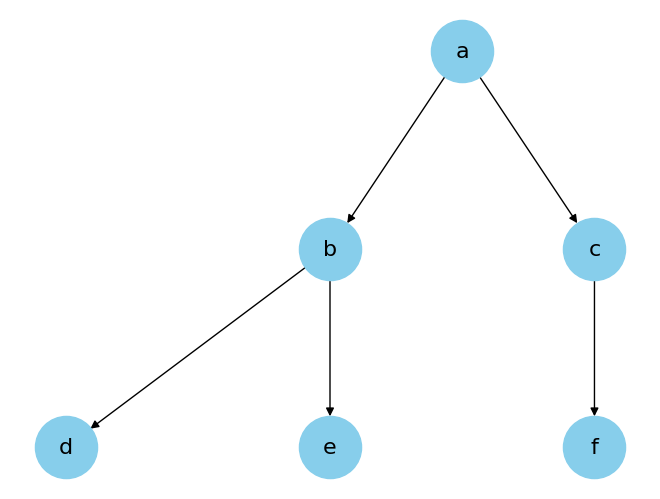

Reflected Tree:


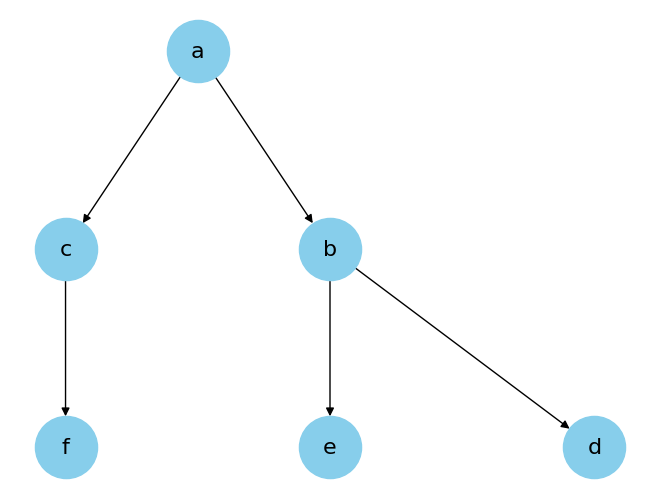

In [7]:
import matplotlib.pyplot as plt
# import pygraphviz
import networkx as nx
import uuid

class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.id = uuid.uuid4()  # Unique identifier for each node

def reflect_tree(root):
    if root is None:
        return None
    root.left, root.right = root.right, root.left
    reflect_tree(root.left)
    reflect_tree(root.right)
    return root

def add_edges(graph, node):
    """
    Recursively adds edges to the graph based on the TreeNode structure.
    """
    if node.left is not None:
        graph.add_edge(node.id, node.left.id)
        add_edges(graph, node.left)
    if node.right is not None:
        graph.add_edge(node.id, node.right.id)
        add_edges(graph, node.right)

def draw_tree(root):
    """
    Draws the binary tree using matplotlib and networkx.
    """
    graph = nx.DiGraph()
    nodes_queue = [root]

    while nodes_queue:
        current = nodes_queue.pop(0)
        graph.add_node(current.id, label=current.value)
        if current.left:
            nodes_queue.append(current.left)
        if current.right:
            nodes_queue.append(current.right)

    add_edges(graph, root)

    pos = nx.drawing.nx_agraph.graphviz_layout(graph, prog='dot')
    labels = {node:graph.nodes[node]['label'] for node in graph.nodes()}

    nx.draw(graph, pos, labels=labels, with_labels=True, node_size=2000, node_color='skyblue', font_size=16, arrowstyle='-|>', arrowsize=12)
    plt.show()

# Test the reflect_tree function
if __name__ == "__main__":
    # Create and build the tree
    a, b, c, d, e, f = [TreeNode(x) for x in ['a', 'b', 'c', 'd', 'e', 'f']]
    a.left, a.right = b, c
    b.left, b.right = d, e
    c.left = f

    print("Original Tree:")
    draw_tree(a)

    reflect_tree(a)

    print("Reflected Tree:")
    draw_tree(a)


Original Tree:


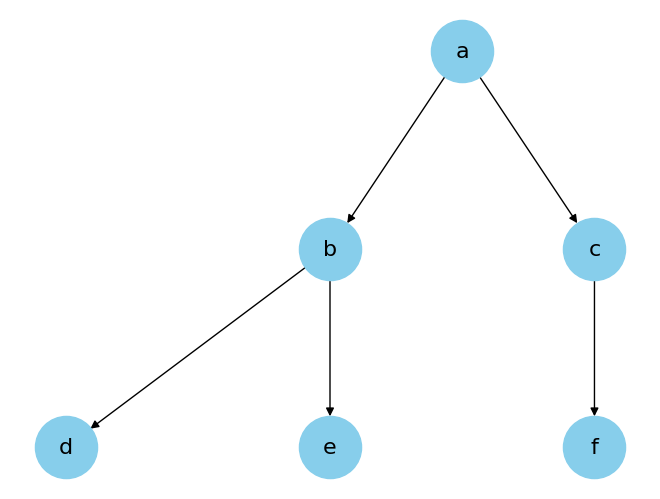

Inverted Tree:


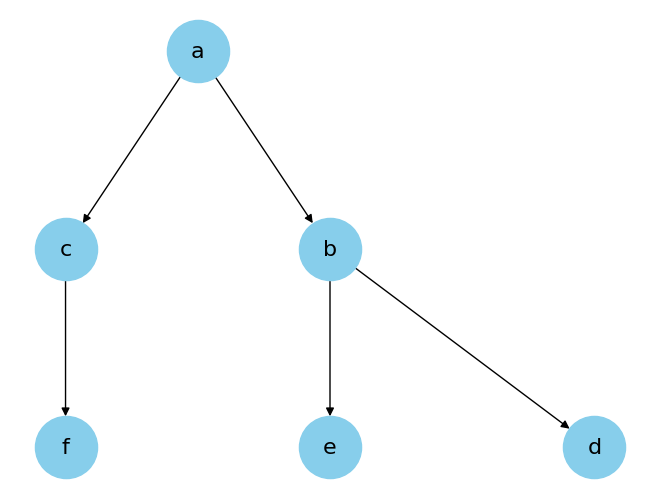

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
import uuid

class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.id = uuid.uuid4()

def invert_tree(root):
    if root is None:
        return None
    root.left, root.right = invert_tree(root.right), invert_tree(root.left)
    return root

def add_edges(graph, node):
    if node.left is not None:
        graph.add_edge(node.id, node.left.id)
        add_edges(graph, node.left)
    if node.right is not None:
        graph.add_edge(node.id, node.right.id)
        add_edges(graph, node.right)

def draw_tree(root):
    graph = nx.DiGraph()
    nodes_queue = [root]

    while nodes_queue:
        current = nodes_queue.pop(0)
        graph.add_node(current.id, label=current.value)
        if current.left:
            nodes_queue.append(current.left)
        if current.right:
            nodes_queue.append(current.right)

    add_edges(graph, root)
    pos = nx.drawing.nx_agraph.graphviz_layout(graph, prog='dot')
    labels = {node:graph.nodes[node]['label'] for node in graph.nodes()}
    nx.draw(graph, pos, labels=labels, with_labels=True, node_size=2000, node_color='skyblue', font_size=16, arrowstyle='-|>', arrowsize=12)
    plt.show()

# Test the invert_tree function
if __name__ == "__main__":
    # Create and build the tree
    a, b, c, d, e, f = [TreeNode(x) for x in ['a', 'b', 'c', 'd', 'e', 'f']]
    a.left, a.right = b, c
    b.left, b.right = d, e
    c.left = f

    print("Original Tree:")
    draw_tree(a)

    invert_tree(a)

    print("Inverted Tree:")
    draw_tree(a)


In [6]:
!sudo apt-get install graphviz libgraphviz-dev pkg-config

!pip install pygraphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pkg-config is already the newest version (0.29.2-1ubuntu3).
graphviz is already the newest version (2.42.2-6).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 15 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jamm